# 외곽선 검출

영역을 구분짓는 경계선을 외곽선이라고 함  

보통은 가장 밖에만 있는 외곽선을 분석한다.  

contour란 __점의 집합__이다.  

객체 하나의 외곽선은 점으로 이루어져있다.  

점의 포인트 리스트가 return된다.  

`findConours`  
기본적으로 바이너리 타입의 이미지를 기반으로 추출한다.  
hierarchy: 

4개의 옵션이 있는데   
__RETR_EXTERNAL__ : 가장 외곽에 있는 컨투어만 찾기  
__RETR_LIST__ : 전체 모든 컨투어를 찾아주는데 리스트로 준다.  
__RETR_CCOMP__: 계층구조로써   
__RETR_TREE__: 계층구조 , 트리구조  

상위 두가지가 많이 쓰이지만 다루기가 쉽지않다.  

ContourApproximationModes 열거형 상수  
__CHAIN_APPROX_NONE__: 체 외각의 4개의 점이 있을 때 원래의 포인트를 다 쓰겠다는 것으로 도믄 외각선 점들의 좌표를 저장한다.  
__CHAIN_APPROX_SIMPLE__: 외곽선 중에서 수평선, 수직선, 대각선 성분은 끝점만 저장한다.  
__CHAIN_APPROX_TC89_L1__: Teh & Chin L1 근사화를 적용한다.  
~~  




In [2]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [19]:
src = cv2.imread('vision/contours.bmp', cv2.IMREAD_GRAYSCALE)

# contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) # 모든 컨투어 리턴
# contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) # 
contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 


In [21]:
print(len(contours)) # 9개의 원소를 가지고 있는 리스트 리턴
print(contours[0].shape) # 120개의 점으로 이루어져있으며, 항상1, ,x,y좌표로 이루어진 ndarray
print(contours[1].shape) # SIMPLE일 경우 확연하게 적어진 것을 확인
# EXTERNAL일 경우 더 적음

cnt = contours[0] # 120 x 1 x 2
print(cnt[0,0,:])
print(cnt[1,0,:])


2
(4, 1, 2)
(4, 1, 2)
[ 50 200]
[ 50 349]


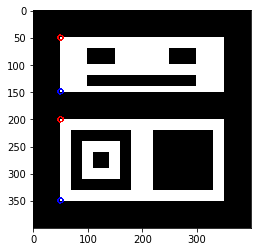

In [22]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(len(contours)):
    cnt = contours[y]
    cv2.circle(dst, (cnt[0,0,0], cnt[0,0,1]), 5, (0, 0, 255), 2)
    cv2.circle(dst, (cnt[1,0,0], cnt[1,0,1]), 5, (255, 0, 0), 2)


imshow("", dst)

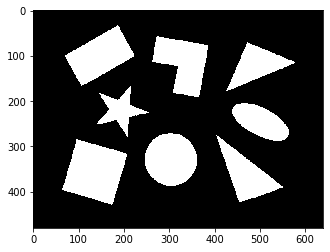

In [69]:
src = cv2.imread('vision/polygon.bmp', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
imshow('', src_bin)
src_bin = cv2.medianBlur(src_bin, 5)
# contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) # 모든 컨투어 리턴
# contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) # 
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 


In [70]:
print(len(contours)) # 9개의 원소를 가지고 있는 리스트 리턴
print(contours[0].shape) # 120개의 점으로 이루어져있으며, 항상1, ,x,y좌표로 이루어진 ndarray
print(contours[1].shape) # SIMPLE일 경우 확연하게 적어진 것을 확인
# EXTERNAL일 경우 더 적음

cnt = contours[0] # 120 x 1 x 2
print(cnt[0,0,:])
print(cnt[1,0,:])
# print(contours)

8
(259, 1, 2)
(226, 1, 2)
[ 98 285]
[ 97 286]


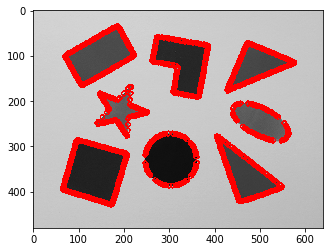

In [46]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(len(contours)):
    cnt = contours[y]
    for i in range(cnt.shape[0]):
        cv2.circle(dst, (cnt[i,0,0], cnt[i,0,1]), 5, (0, 0, 255), 2)
#     cv2.circle(dst, (cnt[1,0,0], cnt[1,0,1]), 5, (255, 0, 0), 2)


imshow("", dst)

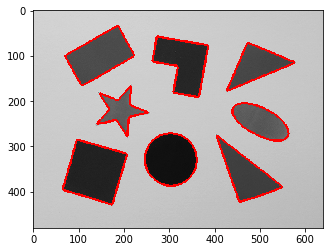

In [47]:
# drawContours 사용하기

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
cv2.drawContours(dst, contours, -1, (0,0,255), 3) # -1: all
imshow("", dst)

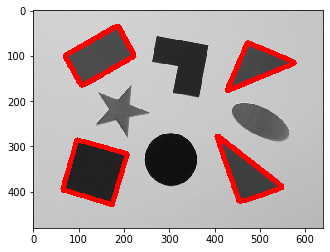

In [50]:
# 점이 500개 이상인 contour만 그리기
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    count = cnt.shape[0]
    if count > 200 : 
        cv2.drawContours(dst, [cnt], 0, (0,0,255), 10)
imshow("", dst)

`approxPolyDP() `  
주어진 공선의 형태를 단순화하여 작은 개수의 점으로 구성된 곡선을 생성함.  

curve: (입력)2차원 점들의 좌표  

epsilon: 근사화 정밀도 파라미터, 입력 곡선과 근사화된 곡선까지의 최대거리를 지정한다.  



In [60]:
cnt = contours[0]
print(cnt.shape)
epsilon = cv2.arcLength(cnt, True) * 0.02 # 전체 길이의 2%
print(epsilon)
approx = cv2.approxPolyDP(cnt, epsilon, True) # 
print(approx.shape)
# count = approx

(259, 1, 2)
9.853523740768432
(4, 1, 2)


## 변곡점 추출

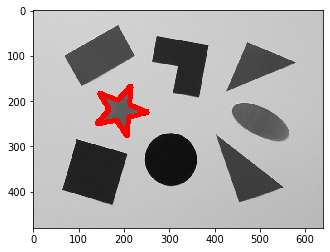

In [80]:

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    epsilon = cv2.arcLength(cnt, True) * 0.02 # 전체 길이의 2%
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    count = approx.shape[0]
    if count == 10 :
        cv2.drawContours(dst, [cnt], 0, (0,0,255), 10)
imshow("", dst)


# 미니프로젝트

책이 몇권인지 찾아보자.

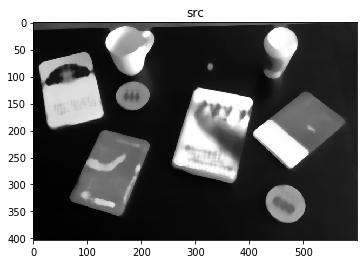

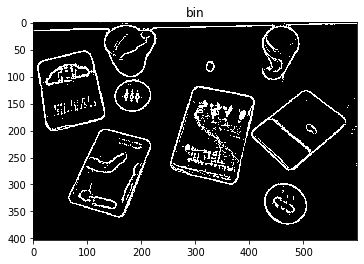

In [320]:
src = cv2.imread('vision/book.jpg', cv2.IMREAD_GRAYSCALE)
# _, src_bin = cv2.adaptiveThreshold(src, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# src = cv2.GaussianBlur(src, (5,5), 0)
src = cv2.medianBlur(src, 15)
imshow("src", src)

src_bin = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 2)
# _, src_bin = cv2.threshold(src_bin, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow("bin", src_bin)



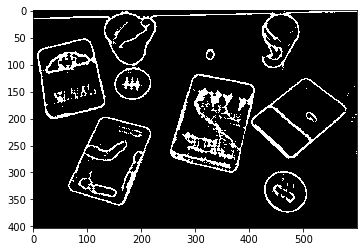

In [334]:
src_copy = src_bin.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
# src_copy = cv2.morphologyEx(src_copy, cv2.MORPH_ERODE, None, iterations=1)

src_copy = cv2.morphologyEx(src_copy, cv2.MORPH_CLOSE, kernel, iterations=1)

imshow("", src_copy)
# contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) # 모든 컨투어 리턴
# contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) # 
contours, _ = cv2.findContours(src_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 


In [282]:
len(contours)

63

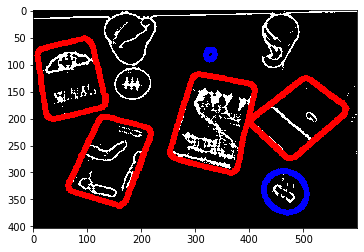

In [336]:
dst = cv2.cvtColor(src_copy, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    epsilon = cv2.arcLength(cnt, True) * 0.02 # 전체 길이의 2%
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    count = approx.shape[0]
    if count == 4 :
        cv2.drawContours(dst, [cnt], 0, (0,0,255), 10)
    elif count == 8 :
        cv2.drawContours(dst, [cnt], 0, (255,0,0), 10)

imshow("", dst)